In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf


In [3]:
data = yf.download('SPY TLT', start = '2002-07-30')
data.drop(['Open', 'High', 'Low', 'Close', 'Volume'], inplace=True, axis=1)
data = data.droplevel(0,axis=1)
rets = data.pct_change().fillna(0)

[*********************100%***********************]  2 of 2 completed


# 1. Sharpe Ratio

$$ Sharpe = \frac{μ_{p} - r_{f}}{σ_{p}} $$

One important thing to note, as with any other performance metric, is that the time frame for measuring returns and risks must be consistent. For this reason, these metrics are generally annualized for calculation.

In [5]:
# risk free rate as 0 
sharpe_ratio = rets.mean() * np.sqrt(252) / rets.std()
spy_sharpe_ratio = sharpe_ratio[0]
tlt_sharpe_ratio = sharpe_ratio[1]

print(spy_sharpe_ratio)
print(tlt_sharpe_ratio)

0.6284120472525097
0.36886185204936817


/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_41241/1302502958.py:3: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  spy_sharpe_ratio = sharpe_ratio[0]
/var/folders/h1/6sllxx6j0zb6l_hvj_9ys3qh0000gn/T/ipykernel_41241/1302502958.py:4: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  tlt_sharpe_ratio = sharpe_ratio[1]


Calculated the overall Sharpe ratio as above. 
Now, calculate the rolling Sharpe ratio on an annual basis by using the rolling() method to compute the Sharpe ratio over a moving window. This allows us to assess how the Sharpe ratio evolves over time on a rolling one-year basis.

In [6]:
lookback = 252
rolling_sharpe_ratio = rets.rolling(lookback).mean() * np.sqrt(252) / rets.rolling(lookback).std()

spy_rolling_sharpe = rolling_sharpe_ratio['SPY']
tlt_rolling_sharpe = rolling_sharpe_ratio['TLT']


In [7]:
tlt_rolling_sharpe

Date
2002-07-30 00:00:00+00:00         NaN
2002-07-31 00:00:00+00:00         NaN
2002-08-01 00:00:00+00:00         NaN
2002-08-02 00:00:00+00:00         NaN
2002-08-05 00:00:00+00:00         NaN
                               ...   
2024-09-09 00:00:00+00:00    0.687737
2024-09-10 00:00:00+00:00    0.706326
2024-09-11 00:00:00+00:00    0.745459
2024-09-12 00:00:00+00:00    0.682970
2024-09-13 00:00:00+00:00    0.692016
Name: TLT, Length: 5570, dtype: float64

Text(0, 0.5, '1-Year Rolling Sharpe Ratio')

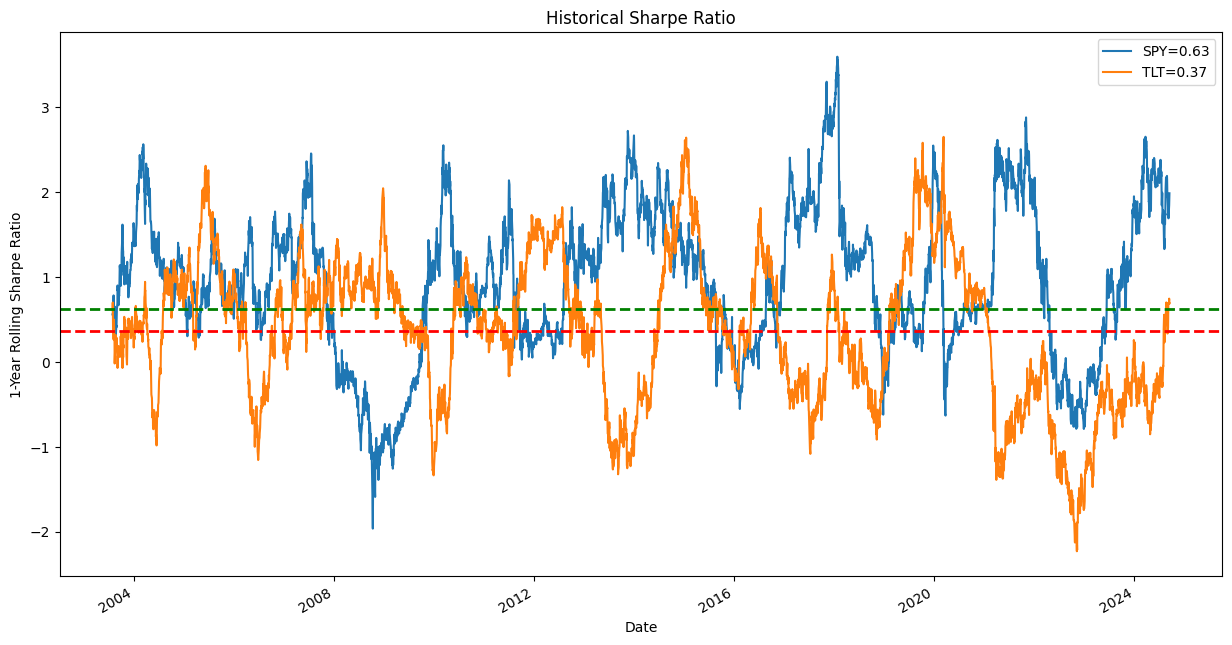

In [8]:
plt.figure(figsize=(15, 8))
spy_rolling_sharpe.plot(label='SPY={}'.format(np.round(spy_sharpe_ratio, 2)))
tlt_rolling_sharpe.plot(label='TLT={}'.format(np.round(tlt_sharpe_ratio, 2)))
plt.axhline(spy_sharpe_ratio, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_sharpe_ratio, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.title('Historical Sharpe Ratio')
plt.xlabel('Date')
plt.ylabel('1-Year Rolling Sharpe Ratio')

# 2. Sortino Ratio

$$ Sortino = \frac{μ_{p} - r_{f}}{Dσ_{p}} $$

In [9]:
spy_rets = rets['SPY']
tlt_rets = rets['TLT']

spy_rets_copy = spy_rets.copy()
tlt_rets_copy = tlt_rets.copy()

spy_rets_copy[spy_rets_copy >= 0] = 0
tlt_rets_copy[tlt_rets_copy >= 0] = 0

spy_down_dev = spy_rets_copy.std() * np.sqrt(252)
tlt_down_dev = tlt_rets_copy.std() * np.sqrt(252)

In [10]:
spy_sortino = spy_rets.mean() * 252 / spy_down_dev
tlt_sortino = tlt_rets.mean() * 252 / tlt_down_dev
print(spy_sortino)
print(tlt_sortino)

0.9851740335628217
0.6187263461995904


1 year Rolling Sortino

In [11]:
lookback = 252
spy_rolling_sortino = spy_rets.rolling(lookback).mean() * np.sqrt(252) / spy_rets_copy.rolling(lookback).std()
tlt_rolling_sortino = tlt_rets.rolling(lookback).mean() * np.sqrt(252) / tlt_rets_copy.rolling(lookback).std()

Text(0.5, 1.0, 'Historical Sortino Ratio')

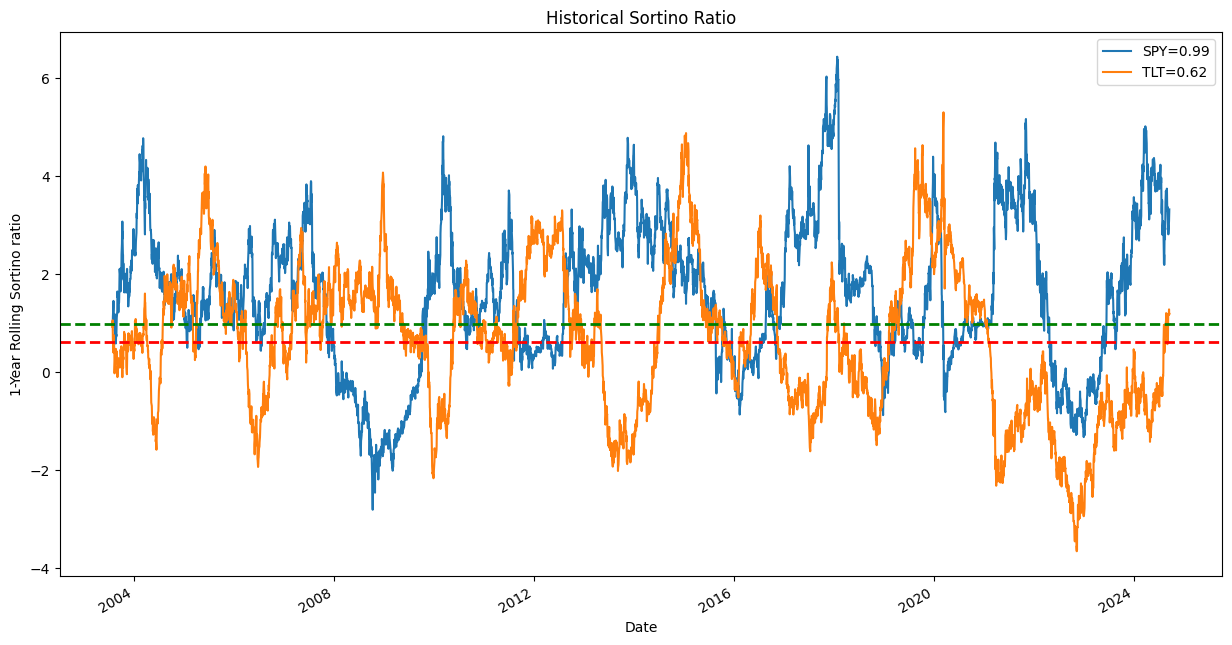

In [12]:
plt.figure(figsize=(15,8))
spy_rolling_sortino.plot(label='SPY={}'.format(np.round(spy_sortino, 2)))
tlt_rolling_sortino.plot(label='TLT={}'.format(np.round(tlt_sortino, 2)))
plt.axhline(spy_sortino, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_sortino, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('1-Year Rolling Sortino ratio')
plt.title('Historical Sortino Ratio')

# 3. Calmar Ratio

$$ Calmar = -\frac{μ_{p} - r_{f}}{MDD_{p}} $$

When calculating the Calmar ratio, we need to add a minus sign in front to align its direction with other performance metrics. This way, a higher Calmar ratio indicates better performance, while a lower ratio indicates worse performance.


Additionally, when calculating the rolling Calmar ratio, it's common practice to use 3 years of data to calculate the maximum drawdown.

In [13]:
dd = data / data.cummax() - 1
dd

Ticker,SPY,TLT
Date,,
2002-07-30 00:00:00+00:00,0.000000,0.000000
2002-07-31 00:00:00+00:00,0.000000,0.000000
2002-08-01 00:00:00+00:00,-0.026108,0.000000
2002-08-02 00:00:00+00:00,-0.047938,0.000000
2002-08-05 00:00:00+00:00,-0.081066,0.000000
...,...,...
2024-09-09 00:00:00+00:00,-0.032663,-0.353110
2024-09-10 00:00:00+00:00,-0.028450,-0.348581
2024-09-11 00:00:00+00:00,-0.018482,-0.349098


In [16]:
spy_calmar = - spy_rets.mean() * 252 / dd['SPY'].min()
tlt_calmar = - tlt_rets.mean() * 252 / dd['TLT'].min()

print(spy_calmar)
print(tlt_calmar)

0.21593002729348898
0.11048623449023857


1 Year Rolling Calmar
- For return we use 1 year
- For DD, we use 3 years

In [17]:
lookback = 252

spy_rolling_calmar = - spy_rets.rolling(lookback).mean() * 252 / dd['SPY'].rolling(lookback * 3).min()
tlt_rolling_calmar = - tlt_rets.rolling(lookback).mean() * 252 / dd['TLT'].rolling(lookback * 3).min()

Text(0.5, 1.0, 'Historical Calmar Ratio')

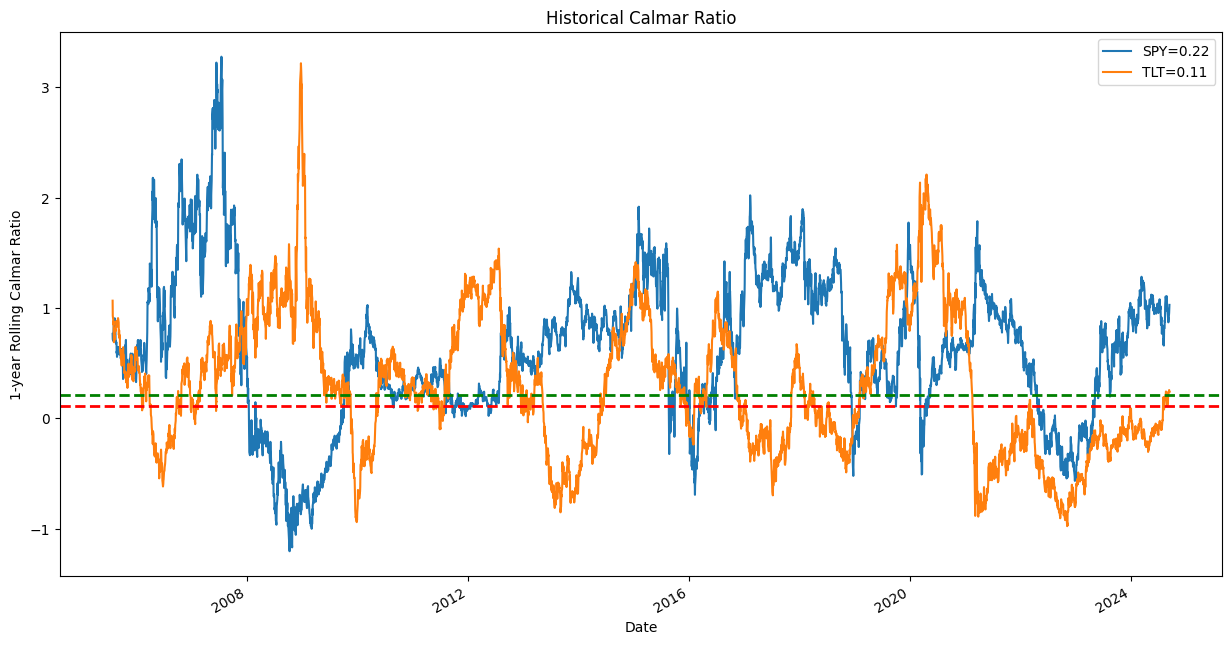

In [18]:
plt.figure(figsize=(15, 8))
spy_rolling_calmar.plot(label='SPY={}'.format(np.round(spy_calmar, 2)))
tlt_rolling_calmar.plot(label='TLT={}'.format(np.round(tlt_calmar, 2)))
plt.axhline(spy_calmar, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_calmar, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('1-year Rolling Calmar Ratio')
plt.title('Historical Calmar Ratio')

# 4.Reward-to-VaR Ratio

$$ VaR Ratio = -\frac{\mu_{p} - r_{f}}{N * VaR_{δ, p}} $$

There are two key points to keep in mind when calculating this metric:

Similar to the Calmar ratio, if VaR is calculated as a negative value, you need to add a minus sign to ensure the metric becomes positive.
The period of the average return and VaR must be the same. Since the average return is already annualized, to match this, you need to annualize the VaR by multiplying it by 𝑁, where N is the number of periods (e.g., trading days in a year).


In [19]:
delta = 0.01
spy_VaR = spy_rets.quantile(delta)
tlt_VaR = tlt_rets.quantile(delta)

In [22]:
spy_VaR_ratio = - spy_rets.mean() / spy_VaR
tlt_VaR_ratio = - tlt_rets.mean() / tlt_VaR

print(spy_VaR_ratio)
print(tlt_VaR_ratio)

0.013806506822234615
0.009238077286931703


1 Year Rolling VaR

In [23]:
lookback = 252
spy_rolling_VaR_ratio = spy_rets.rolling(lookback).mean() / - spy_rets.rolling(lookback).quantile(delta)
tlt_rolling_VaR_ratio = tlt_rets.rolling(lookback).mean() / - tlt_rets.rolling(lookback).quantile(delta)

Text(0.5, 1.0, 'Historical Reward-to-VaR Ratio')

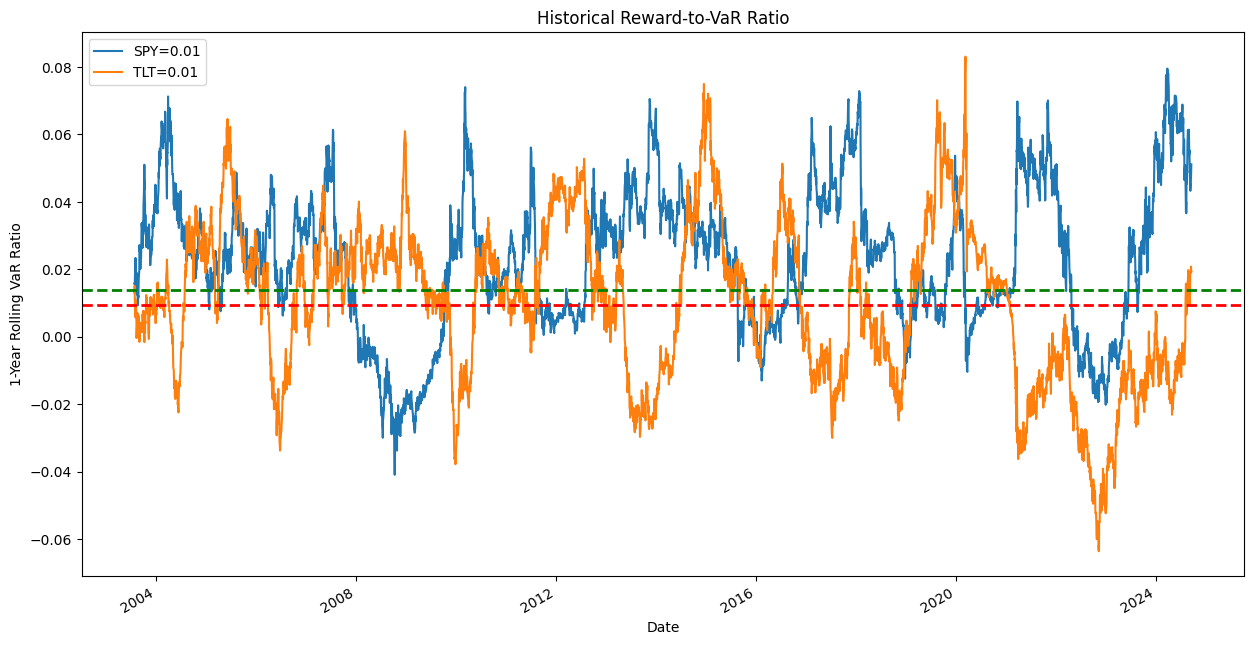

In [24]:
plt.figure(figsize=(15, 8))
spy_rolling_VaR_ratio.plot(label='SPY={}'.format(np.round(spy_VaR_ratio, 2)))
tlt_rolling_VaR_ratio.plot(label='TLT={}'.format(np.round(tlt_VaR_ratio, 2)))
plt.axhline(spy_VaR_ratio, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_VaR_ratio, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('1-Year Rolling VaR Ratio')
plt.title('Historical Reward-to-VaR Ratio')

# 5. Reward-to-CVaR Ratio

$$ CVaR Ratio = -\frac{μ_{p} - r_{f}}{CVaR_{δ, p}} $$


In [25]:
def calculate_CVaR(rets, delta=0.01):
    VaR = rets.quantile(delta)
    return rets[rets<=VaR].mean()

In [26]:
spy_CVaR = calculate_CVaR(spy_rets)
tlt_CVaR = calculate_CVaR(tlt_rets)

spy_CVaR_ratio = spy_rets.mean() / -spy_CVaR
tlt_CVaR_ratio = tlt_rets.mean() / -tlt_CVaR

print(spy_CVaR_ratio)
print(tlt_CVaR_ratio)

0.00951001167161698
0.007356949870389063


1 Year Rolling CVaR

In [27]:
lookback = 252
spy_rolling_CVaR_ratio = spy_rets.rolling(lookback).mean() / -spy_rets.rolling(lookback).apply(calculate_CVaR)
tlt_rolling_CVaR_ratio = tlt_rets.rolling(lookback).mean() / -tlt_rets.rolling(lookback).apply(calculate_CVaR)

Text(0.5, 1.0, 'Historical Reward-to-CVaR Ratio')

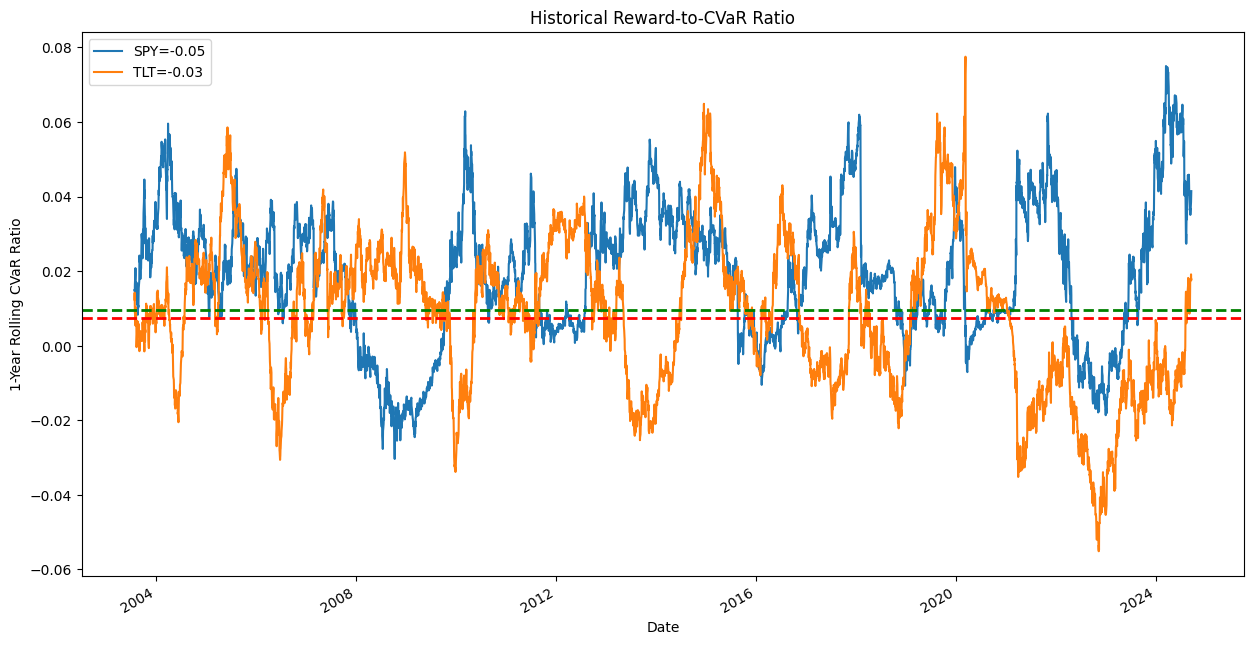

In [28]:
plt.figure(figsize=(15, 8))
spy_rolling_CVaR_ratio.plot(label='SPY={}'.format(np.round(spy_CVaR, 2)))
tlt_rolling_CVaR_ratio.plot(label='TLT={}'.format(np.round(tlt_CVaR, 2)))
plt.axhline(spy_CVaR_ratio, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_CVaR_ratio, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('1-Year Rolling CVaR Ratio')
plt.title('Historical Reward-to-CVaR Ratio')

# 6. Hit Ratio


$$ HR = \frac{Σ_{i=1}^{N}1_{\{r_{i}>0\}}}{N} $$




In [29]:
def calculate_hit_ratio(rets):
    return len(rets[rets > 0.0]) / len(rets[rets != 0.0])

In [30]:
spy_hit_ratio = calculate_hit_ratio(spy_rets)
tlt_hit_ratio = calculate_hit_ratio(tlt_rets)

print(spy_hit_ratio)
print(tlt_hit_ratio)

0.552451333813987
0.5259927797833935


Rolling Hit Ratio

In [31]:
spy_rolling_hit_ratio = spy_rets.rolling(252).apply(calculate_hit_ratio)
tlt_rolling_hit_ratio = tlt_rets.rolling(252).apply(calculate_hit_ratio)

Text(0.5, 1.0, 'Historical Hit Ratio')

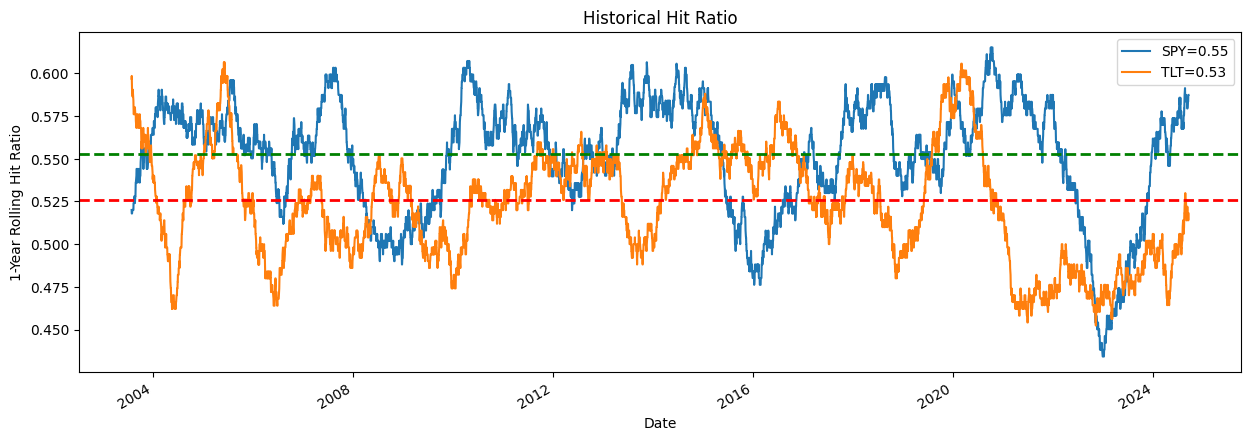

In [32]:
plt.figure(figsize=(15, 5))
spy_rolling_hit_ratio.plot(label='SPY={}'.format(np.round(spy_hit_ratio, 2)))
tlt_rolling_hit_ratio.plot(label='TLT={}'.format(np.round(tlt_hit_ratio, 2)))
plt.axhline(spy_hit_ratio, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_hit_ratio, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('1-Year Rolling Hit Ratio')
plt.title('Historical Hit Ratio')

# 7. Gain-to-Pain Ratio

The concept of the profit-loss ratio simply refers to the ratio between losses and profits. Unlike the win rate, which measures how many times you won or lost, the profit-loss ratio focuses on how much you gained when you won and how much you lost when you lost. The profit-loss ratio is calculated by dividing the average profit per trade, which is the total profit divided by the number of winning trades, by the average loss per trade, which is the total loss divided by the number of losing trades. At the end of the calculation, you need to add a minus sign because the average loss is a negative value. Naturally, the higher this value, the better the performance. For example, if the profit-loss ratio is 3, this means that the profit made in a single winning trade is three times larger than the loss incurred in a single losing trade, on average. The profit-loss ratio can be calculated using the following formula:

$$ GPR = -\frac{Σ_{i=1}^{N}max(r_{i}, 0)}{Σ_{i=1}^{N}min(r_{i}, 0)} $$

We can use the win rate and profit-loss ratio to calculate the probabilistic edge of an investment strategy. The probabilistic edge here refers to an indicator that helps determine whether this "game" is likely to favor us in the long term. If there is no probabilistic edge, meaning this value is negative, we should avoid using that strategy because it will lead to long-term losses. The condition for having a positive probabilistic edge can be expressed as follows using the win rate and profit-loss ratio.

The condition for the existence of a probabilistic edge
$$ GPR > \frac{1 - HR}{HR} $$



In [33]:
# GPR
def calculate_gtp_ratio(rets):
    return rets[rets > 0.0].mean() / -rets[rets < 0.0].mean()

In [34]:
spy_gtp_ratio = calculate_gtp_ratio(spy_rets)
tlt_gtp_ratio = calculate_gtp_ratio(tlt_rets)

print(spy_gtp_ratio)
print(tlt_gtp_ratio)

0.9149944463480341
0.9589717411144905


1 Year Rolling GPR

In [35]:
spy_rolling_gtp_ratio = spy_rets.rolling(252).apply(calculate_gtp_ratio)
tlt_rolling_gtp_ratio = tlt_rets.rolling(252).apply(calculate_gtp_ratio)

Text(0.5, 1.0, 'Historical Gain-to-Pain Ratio')

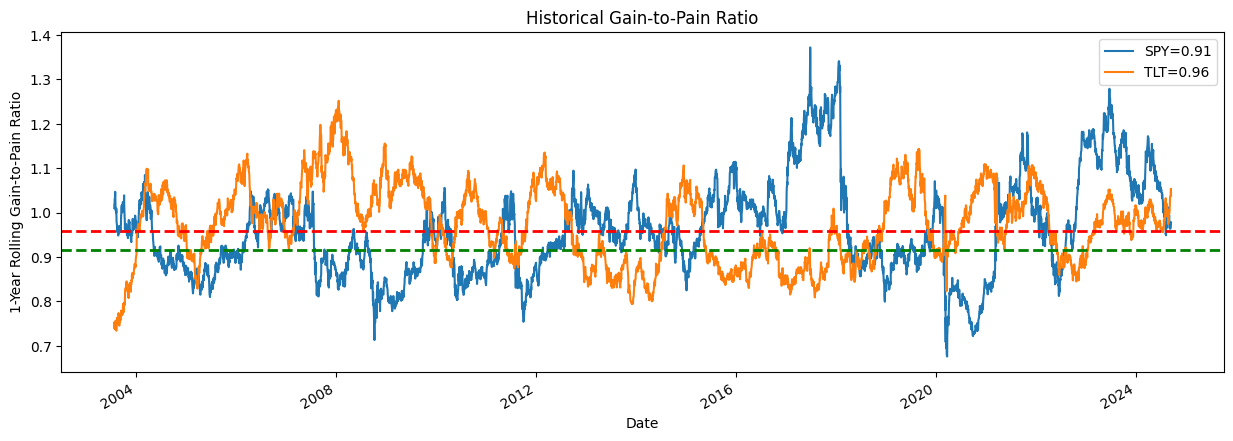

In [36]:
plt.figure(figsize=(15, 5))
spy_rolling_gtp_ratio.plot(label='SPY={}'.format(np.round(spy_gtp_ratio, 2)))
tlt_rolling_gtp_ratio.plot(label='TLT={}'.format(np.round(tlt_gtp_ratio, 2)))
plt.axhline(spy_gtp_ratio, color='g', linestyle='dashed', linewidth=2)
plt.axhline(tlt_gtp_ratio, color='r', linestyle='dashed', linewidth=2)
plt.legend()
plt.xlabel('Date')
plt.ylabel('1-Year Rolling Gain-to-Pain Ratio')
plt.title('Historical Gain-to-Pain Ratio')

In [37]:
spy_TE = spy_gtp_ratio > (1 - spy_hit_ratio) / spy_hit_ratio
print(spy_TE)

True


In [38]:
tlt_TE = tlt_gtp_ratio > (1 - tlt_hit_ratio) / tlt_hit_ratio
print(tlt_TE)

True


## Both ETFs have a probabilistic edge, indicating that a buy-and-hold strategy is a meaningful long-term investment approach for these two ETFs.